<a href="https://colab.research.google.com/github/Adharsh0001/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the dataset

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Machine-Learning/main/StudentsPerformance.csv")

In [5]:
dataset

,gender,Scores,Percentage
0,female,72,72
1,female,69,90
2,female,90,95
3,male,47,57
4,male,76,78
...,...,...,...
995,female,88,99
996,male,62,55
997,female,59,71
998,female,68,78


Describe the dataset

In [6]:
print(dataset.shape)
dataset.head()

(1000, 3)


,gender,Scores,Percentage
0,female,72,72
1,female,69,90
2,female,90,95
3,male,47,57
4,male,76,78


In [11]:
B = dataset.groupby("gender")["Scores"].mean()
B

gender
female    63.633205
male      68.728216
Name: Scores, dtype: float64

In [12]:
dataset.describe()

,Scores,Percentage
count,1000.00000,1000.000000
mean,66.08900,69.169000
std,15.16308,14.600192
min,0.00000,17.000000
25%,57.00000,59.000000
50%,66.00000,70.000000
75%,77.00000,79.000000
max,100.00000,100.000000


No skew in the data

In [13]:
dataset.isnull().sum()

gender        0
Scores        0
Percentage    0
dtype: int64

Remove the duplicates. If specific column has to be checked, then add the columns value inside duplicates()

In [14]:
dataset = dataset.drop_duplicates()

In [15]:
dataset.dtypes

gender        object
Scores         int64
Percentage     int64
dtype: object

In [16]:
dataset.describe()

,Scores,Percentage
count,811.000000,811.000000
mean,65.514180,68.430333
std,15.809069,15.093078
min,0.000000,17.000000
25%,55.000000,58.000000
50%,66.000000,69.000000
75%,77.000000,79.000000
max,100.000000,100.000000


Do the EDA

Plot the dataset against hours vs scores

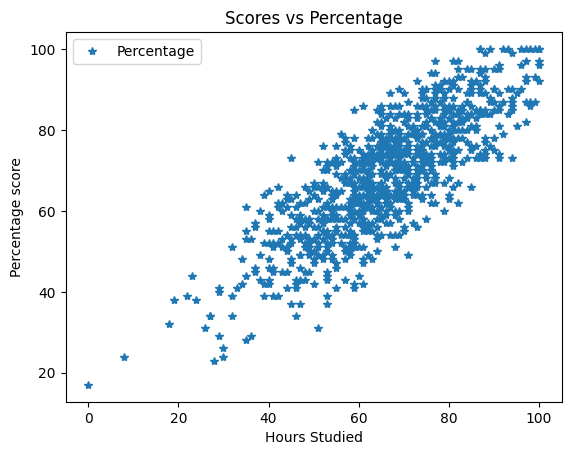

In [17]:
dataset.plot(x = "Scores", y = "Percentage", style = '*')
plt.title("Scores vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage score")
plt.show()

calculate the correlation

In [18]:
dataset.corr()

<ipython-input-18-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Scores,Percentage
Scores,1.000000,0.818755
Percentage,0.818755,1.000000


Split the data

In [19]:
X = dataset.loc[:,"Scores"].values
Y = dataset.loc[:,"Percentage"].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 7)

In [20]:
Y_test.shape #shape of test data

(163,)

random state is used to reproduce the results 

Scaling/ Normalising

In [21]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
arr = np.array(X_train)
arr_2 = np.array(X_test)
arr_3 = np.array(Y_train)
arr_4 = np.array(Y_test)
X_test = arr_2.reshape(-1,1)
X_train = arr.reshape(-1,1)
Y_train = arr_3.reshape(-1,1)
#Y_test = arr_4.reshape(-1,1)
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

Standard scaler = ( x -mean(x) )/  s.d(x) - value takes between -3 to 3

Min Max scaler  = (x - min(x))/(max(x)-min(x)) - value takes between 0 to 1

In [22]:
#arr = np.array(X_train)
#X_train = arr.reshape(-1,1)

In [23]:
#arr = np.array(X_test)
#X_test = arr.reshape(-1,1)

In [24]:
Y_train.shape

(648, 1)

Applying the Model

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

C value

In [26]:
print(regressor.intercept_)

[18.14142756]


M Value

In [27]:
print(regressor.coef_)

[[0.76996196]]


The relationship that is found out Predicted score = 9.87 * hours + 1.72

In [28]:
regressor.predict([[100]])

array([[95.13762393]])

If we need to see the Predicted Y values for X test

In [29]:
Y_Pred = regressor.predict(X_test)
Y_Pred.shape

(163, 1)

In [30]:
# A = np.array(Y_test)
# Y_test = A.reshape(1,-1)
B = np.array(Y_Pred)
Y_Pred = B.reshape(-1)
Y_Pred.shape

(163,)

In [31]:
Y_test.shape

(163,)

To get the values of predicted against actual

In [32]:
df = pd.DataFrame({"Actual":Y_test,"Predicted": Y_Pred})


Evaluation Metrics

In [33]:
from sklearn import metrics
print('R2-score:', metrics.r2_score(Y_test,Y_Pred))

R2-score: 0.688868817252849
